In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Keras/Diabetes Binary Classification.csv')

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Class variable (0 or 1)')
y = df['Class variable (0 or 1)']
X = X.values
y = y.values

In [5]:
X.shape

(768, 8)

In [6]:
y.shape

(768,)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without Early Stopping

In [9]:
model = Sequential()

model.add(Dense(units=8, input_shape=(8,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_test_scaled, Y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5422 - loss: 0.6862 - val_accuracy: 0.6753 - val_loss: 0.6515
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6711 - loss: 0.6561 - val_accuracy: 0.6883 - val_loss: 0.6220
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7173 - loss: 0.6212 - val_accuracy: 0.7208 - val_loss: 0.5962
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7467 - loss: 0.5823 - val_accuracy: 0.7403 - val_loss: 0.5715
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.5630 - val_accuracy: 0.7468 - val_loss: 0.5498
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7261 - loss: 0.5644 - val_accuracy: 0.7597 - val_loss: 0.5284
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7441 - loss: 0.5434 - val_accuracy: 0.7727 - val_loss: 0.5117
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7701 - loss: 0.5201 - val_accuracy: 0.7792 

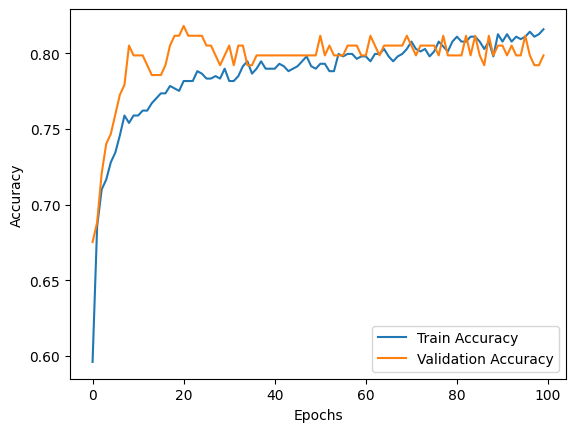

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# With Early Stopping


In [13]:
callbacks = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=1,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [14]:
model1 = Sequential()

model1.add(Dense(units=16, input_shape=(8,), activation='relu'))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

In [15]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history1 = model1.fit(X_train_scaled, Y_train, epochs=100, callbacks=[callbacks], validation_data=(X_test_scaled, Y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6590 - loss: 0.6443 - val_accuracy: 0.7143 - val_loss: 0.5794
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6665 - loss: 0.5944 - val_accuracy: 0.7532 - val_loss: 0.5370
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7310 - loss: 0.5521 - val_accuracy: 0.7792 - val_loss: 0.5064
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7633 - loss: 0.5156 - val_accuracy: 0.7857 - val_loss: 0.4845
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7737 - loss: 0.5190 - val_accuracy: 0.8117 - val_loss: 0.4753
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7835 - loss: 0.4822 - val_accuracy: 0.7922 - val_loss: 0.4690
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8062 - loss: 0.4716 - val_accuracy: 0.7987 - val_loss: 0.4650
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7930 - loss: 0.4962 - val_accuracy: 0.7922 - 